In [1]:
'''
loading data from pickle files
'''
import pickle as pkl
trainingdata = 'train.pkl'
train_file = open(trainingdata,'rb')
training_data = pkl.load(train_file)
train_file.close()
testingdata = 'test.pkl'
test_file = open(testingdata,'rb')
testing_data = pkl.load(test_file)
test_file.close()
# print(len(training_data))
# print(len(testing_data))

In [2]:
'''resampling the data into 16 random parts'''
import numpy as np
import random
random.shuffle(training_data) #shuffle the training set
split_data = np.array_split(training_data, 16)   #split training set into 16 parts
# print(split_data[0])

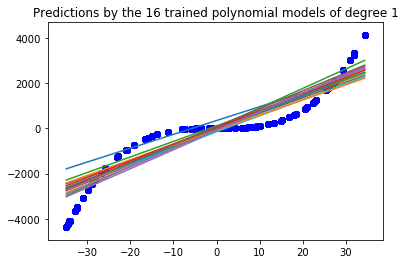

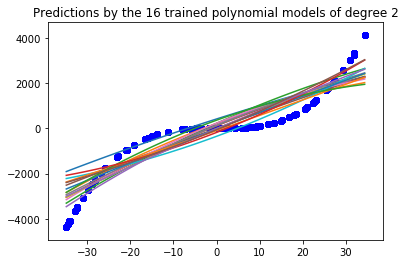

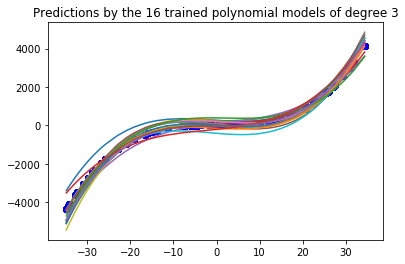

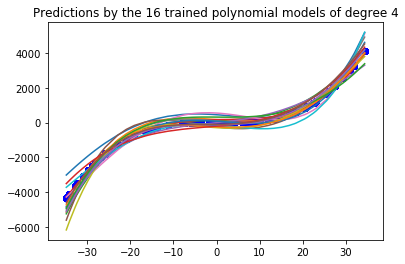

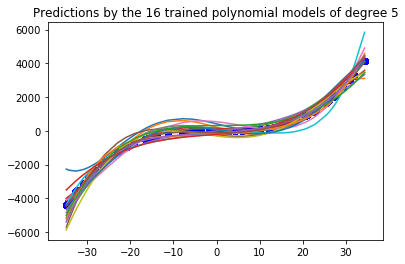

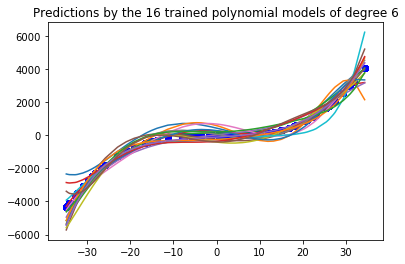

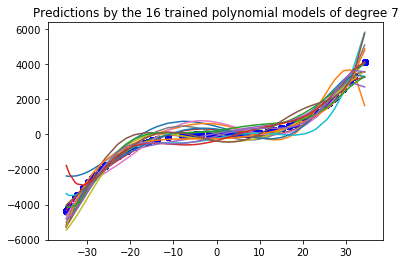

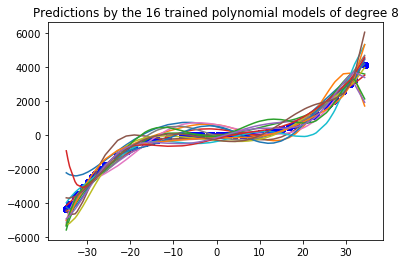

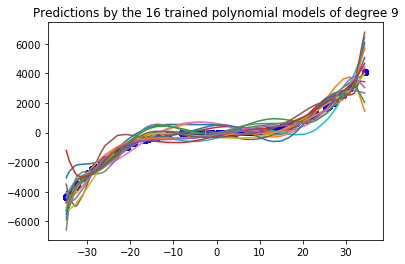

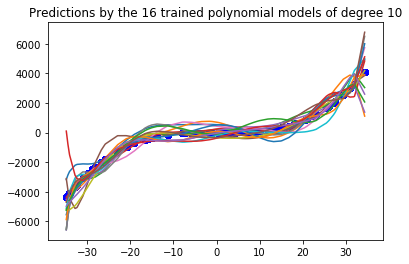

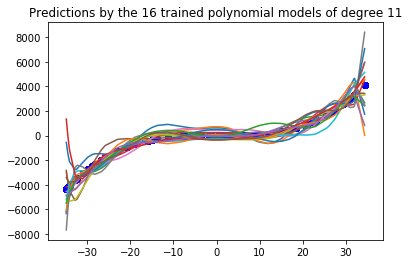

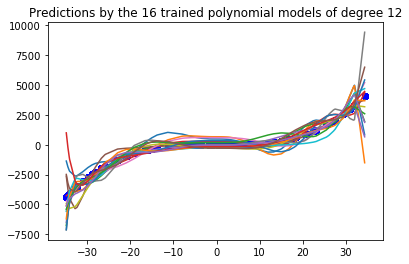

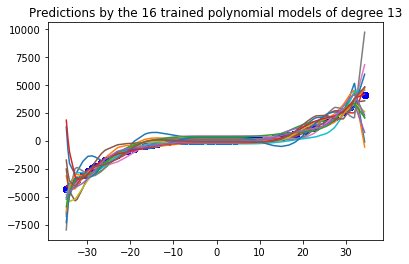

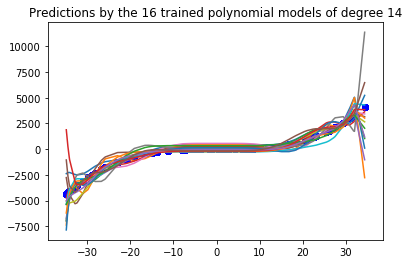

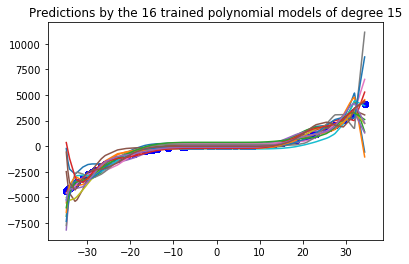

In [3]:
'''
fitting the different models and calculating bias, bias^2, variance, MSE
and irreducible error
'''
import matplotlib.pyplot as plt  # To visualize
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()

X_test = testing_data[:, 0]
Y_test = testing_data[:, 1]
X_test.sort()
Y_test.sort()
X_test = X_test.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
biasoutput = []
varianceoutput = []
mseoutput = []
irrerroutput = []
biassqoutput = []
for j in range(1, 16):

    Y_pred = [[0] * len(X_test)] * 16

    for i in range(16):
        X = split_data[i][:, 0].reshape(-1, 1)
        Y = split_data[i][:, 1].reshape(-1, 1)

        polynomial_features = PolynomialFeatures(degree=j)
        X_poly = polynomial_features.fit_transform(X)
        X_test_poly = polynomial_features.fit_transform(X_test)
        model.fit(X_poly, Y)
        Y_pred[i] = model.predict(X_test_poly)
        plt.scatter(X_test, Y_test, color='blue')
        plt.plot(X_test, Y_pred[i])

    Efhatx = np.sum(Y_pred, axis=0) / 16
    Y_pred_2 = [[0] * len(X_test)] * 16
    Y_pred_3 = [[0] * len(X_test)] * 16
    for b in range(16):
        Y_pred_3[b] = (Y_pred[b] - Y_test) ** 2
    msearray = np.sum(Y_pred_3, axis=0) / 16
    mse = sum(msearray) / len(X_test)
    mseoutput.append(mse)
#     print(mse)

    for a in range(16):
        Y_pred_2[a] = (Y_pred[a] - Efhatx) ** 2
    variancearray = np.sum(Y_pred_2, axis=0) / 16
    variance = sum(variancearray) / len(X_test)
    varianceoutput.append(variance)
#     print(variance)

    biasarray = (Efhatx - Y_test)
    bias = sum(biasarray) / len(X_test)
    biassqavg = sum(biasarray*biasarray) / len(X_test)
    biasoutput.append(bias)
    biassqoutput.append(biassqavg)

    irrerroutput.append(mse - (biassqavg + (variance)))
#     print(bias)
    plt.title("Predictions by the 16 trained polynomial models of degree " + str(j))
    plt.show()


In [4]:
import pandas
df = pandas.DataFrame({"bias values": biasoutput, "variance values": varianceoutput, "irreducible error": irrerroutput})
print(df)

              bias values       variance values          irreducible error
0    [169.65380108066628]   [31419.44363269148]  [-1.1641532182693481e-10]
1    [167.11451680586646]   [53151.51420211772]  [-1.7462298274040222e-10]
2   [-2.0458862830971425]   [70262.27133369332]   [-5.820766091346741e-11]
3    [-5.908523270607782]  [101642.10219212335]  [-1.4551915228366852e-11]
4   [-0.9695525006014464]   [118098.8382996077]                      [0.0]
5    [0.5160519479229577]  [147188.38003859555]   [-8.731149137020111e-11]
6     [5.615579836810786]  [165179.59333230875]    [5.820766091346741e-11]
7     [8.989964384120999]  [193311.71035178742]   [1.4551915228366852e-10]
8     [8.320928953997342]   [216741.8806181068]   [-5.820766091346741e-11]
9    [7.1944905422415815]  [257804.90458121215]                      [0.0]
10   [12.925822326869644]   [351187.2212728218]  [-2.9103830456733704e-10]
11   [11.421746553612275]   [369231.0959516571]  [-1.1641532182693481e-10]
12    [11.91274485087285]

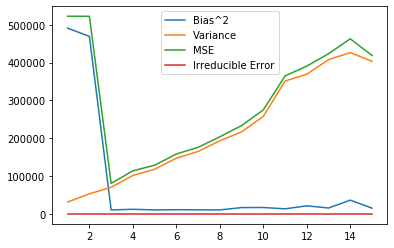

In [5]:
plt.plot(range(1,16) , biassqoutput, label="Bias^2")
plt.plot(range(1,16), varianceoutput, label="Variance")
plt.plot(range(1,16) , mseoutput, label="MSE")
plt.plot(range(1,16) , irrerroutput, label="Irreducible Error")
plt.legend()